# (전북대학교 SW중심대학사업단) 2023년 인공지능 온라인 경진대회

`-` T4 GPU 사용

In [1]:
!pip install lightning==2.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: starlette
    Found existing installation: starlette 0.26.1
    Uninstalling starlette-0.26.1:
      Successfully uninstalled starlette-0.26.1
  Attempting uninstall: fastapi
    Found existing installation: fastapi 0.95.0
    Uninstalling fastapi-0.95.0:
      Successfully uninstalled fastapi-0.95.0


In [2]:
# !pip install easyocr==1.6.2

## 데이터 불러오기

In [3]:
import gc
import os
import warnings
from typing import Dict, List, Optional, Tuple

import easydict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("/kaggle/input/jbnu-swuniv-ai/train_data.csv")
test = pd.read_csv("/kaggle/input/jbnu-swuniv-ai/test_data.csv")
submission = pd.read_csv("/kaggle/input/jbnu-swuniv-ai/sample_submission.csv")

## 시각화

<AxesSubplot: xlabel='count', ylabel='label'>

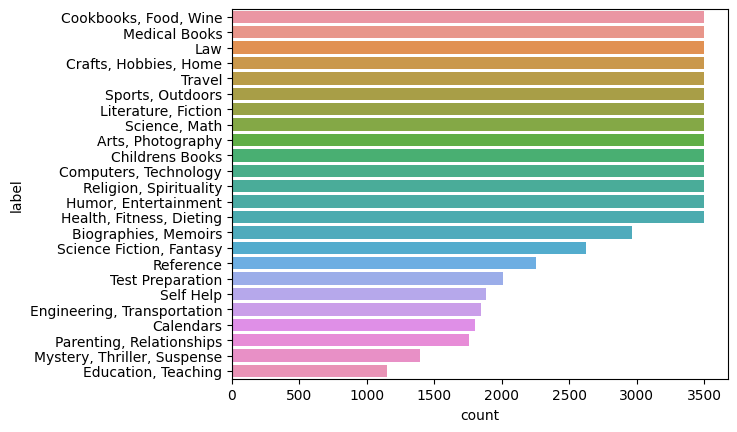

In [5]:
sns.countplot(data=df, y="label", order=df["label"].value_counts().index)

## OCR을 통한 책 커버의 글자 인식 

In [6]:
# import cv2
# import easyocr
# from PIL import Image

In [7]:
# def ocr(paths: List[str]) -> List[str]:
#     reader = easyocr.Reader(["en"], gpu=True)
#     texts = []
#     for path in tqdm(paths):
#         image = cv2.imread(path)
#         image = np.asarray(Image.open(path).convert("L")) if image is None else image
#         result = reader.readtext(image, batch_size=2048, detail=0)
#         text = " ".join(result)
#         texts.append(text)
#     return texts

- train images

In [8]:
# base_path = "/kaggle/input/jbnu-swuniv-ai/train"
# train_paths = ["/".join([base_path, label, file_name]) for file_name, label in zip(df["Filename"], df["label"])]
# train_cover_texts = ocr(train_paths)
# pd.DataFrame({"Filename": df["Filename"].tolist(), "Text": train_cover_texts}).\
# to_csv("/kaggle/working/train-book-cover-text.csv", index=False)

- test images

In [9]:
# base_path = "/kaggle/input/jbnu-swuniv-ai/test"
# test_paths = ["/".join([base_path, file_name]) for file_name in test["Filename"]]
# test_cover_texts = ocr(test_paths)
# pd.DataFrame({"Filename": test["Filename"].tolist(), "Text": test_cover_texts}).\
# to_csv("/kaggle/working/test-book-cover.csv", index=False)

`-` Add Data 버튼을 통해 데이터 추가 (book-cover/train.csv, book-cover/test.csv)

## 전처리

### 오타 교정

In [10]:
# import torch
# from torch.utils.data import Dataset, DataLoader
# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

In [11]:
# class SpellingCorrectionDataset(Dataset):
#     def __init__(self, texts, tokenizer, max_length=180):
#         self.texts = texts
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#     def __getitem__(self, index):
#         text = self.texts[index]
#         token_ids = self.tokenizer.encode(
#             text,
#             padding="max_length",
#             truncation=True,
#             max_length=self.max_length,
#             return_tensors="pt",
#         )
#         token_ids = token_ids.squeeze(0)
#         return token_ids

#     def __len__(self):
#         return len(self.texts)

In [12]:
# def preprocess_cover_text(cover_text: pd.Series) -> pd.Series:
#     cover_text = cover_text.fillna("")
#     cover_text = cover_text.apply(lambda x: x.lower())
#     return cover_text

In [13]:
# def generate_token_ids_list(texts, model, tokenizer, max_length, batch_size, device):
#     dataset = SpellingCorrectionDataset(texts, tokenizer, max_length)  # bert-base-uncased의 경우 토큰 길이들의 99사분위수가 161
#     data_loader = DataLoader(dataset, batch_size=batch_size)
#     output_token_ids_list = []
#     with torch.no_grad():
#         for input_token_ids in tqdm(data_loader):
#             input_token_ids = input_token_ids.to(device)
#             output_token_ids = model.generate(input_token_ids)
#             output_token_ids = output_token_ids.cpu().squeeze(0).tolist()
#             output_token_ids_list.extend(output_token_ids)
#     return output_token_ids_list

In [14]:
# def decode_token_ids_list(token_ids_list, tokenzier):
#     corrected_cover_texts = []
#     for token_ids in tqdm(token_ids_list):
#         corrected_cover_text = tokenizer.decode(token_ids, skip_special_tokens=True)
#         corrected_cover_texts.append(corrected_cover_text)
#     return corrected_cover_texts

In [15]:
# BS = 128
# model_name = "oliverguhr/spelling-correction-english-base"
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [16]:
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)

- train texts

In [17]:
# train_book_cover = pd.read_csv("/kaggle/input/book-cover/train.csv")
# train_book_cover["Text"] = preprocess_cover_text(train_book_cover["Text"])
# train_cover_texts = train_book_cover["Text"].values
# train_output_token_ids_list = generate_token_ids_list(train_cover_texts, model, tokenizer, max_length=180, batch_size=BS, device=device)
# train_corrected_cover_texts = decode_token_ids_list(train_output_token_ids_list, tokenizer)
# train_book_cover["CorrectedText"] = train_corrected_cover_texts
# train_book_cover.to_csv("/kaggle/working/train-corrected-book-cover.csv", index=False)

- test texts

In [18]:
# test_book_cover = pd.read_csv("/kaggle/input/book-cover/test.csv")
# test_book_cover["Text"] = preprocess_cover_text(test_book_cover["Text"])
# test_cover_texts = test_book_cover["Text"].values
# test_output_token_ids_list = generate_token_ids_list(test_cover_texts, model, tokenizer, max_length=180, batch_size=BS, device=device)
# test_corrected_cover_texts = decode_token_ids_list(test_output_token_ids_list, tokenizer)
# test_book_cover["CorrectedText"] = test_corrected_cover_texts 
# test_book_cover.to_csv("/kaggle/working/test-corrected-book-cover.csv", index=False)

`-` Add Data 버튼을 통해 데이터 추가 (corrected-book-cover/train.csv, corrected-book-cover/test.csv)

### 데이터 병합

In [19]:
df = df.merge(pd.read_csv("/kaggle/input/corrected-book-cover/train.csv"))
test = test.merge(pd.read_csv("/kaggle/input/corrected-book-cover/test.csv"))

### 결측치 처리

In [20]:
df["Text"] = df["Text"].fillna("")
df["CorrectedText"] = df["CorrectedText"].fillna("")

test["Text"] = test["Text"].fillna("")
test["CorrectedText"] = test["CorrectedText"].fillna("")

### 타겟 레이블 인코딩

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_encoder = LabelEncoder()
targets = label_encoder.fit_transform(df["label"].values)

## 모델 학습 준비

In [23]:
import lightning.pytorch as pl
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
from torchmetrics.classification import MulticlassF1Score
from transformers import AdamW, AutoModelForSequenceClassification, AutoTokenizer, get_linear_schedule_with_warmup

- 데이터

In [24]:
texts = df["Title"].values
corrected_texts_pair = df["CorrectedText"].values

test_texts = test["Title"].values
test_corrected_texts_pair = test["CorrectedText"].values

- 하이퍼파라미터

In [25]:
NUM_CLASSES = len(df["label"].unique())

In [26]:
args = easydict.EasyDict({
    "weights_dirpath": "/kaggle/working/weights",
    "num_classes": NUM_CLASSES,
    "gradient_clip_val": 2.0,
    "warmup_steps": 0,
    "class_weight": None,
    "label_smoothing": 0.1,
    "max_epochs": 4,
    "train_size": 0.95,
    "log_interval": 1,
    "seed": 26,
})

In [27]:
args_bart = easydict.EasyDict(args)
args_bart.update({
    "model_name": "facebook/bart-large",
    "max_length": 59,
    "lr": 3e-5,
    "batch_size": 64,
})
args_deberta = easydict.EasyDict(args)
args_deberta.update({
    "model_name": "microsoft/deberta-large",
    "max_length": 59,
    "max_epochs": 2,
    "lr": 2e-5,
    "batch_size": 32,
})
args_roberta = easydict.EasyDict(args)
args_roberta.update({
    "model_name": "roberta-large",
    "max_length": 59,
    "lr": 3e-5,
    "batch_size": 64,
    "seed": 442,
})
args_bert = easydict.EasyDict(args)
args_bert.update({
    "model_name": "bert-large-cased",
    "warmup_steps": 100,
    "max_length": 65,
    "lr": 3e-5,
    "batch_size": 64,
    "seed": 2023,
})

In [28]:
del df, test

- 가중치 폴더 생성

In [29]:
def create_folder(path: str) -> None:
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError as error:
        print(error)

In [30]:
create_folder(args.weights_dirpath)

- 토큰 최대 길이 추정

In [31]:
# def get_token_length(tokenizer, text, max_length):
#     fields = tokenizer(
#         text,
#         padding="max_length",
#         truncation=True,
#         max_length=max_length,
#         return_tensors="pt",
#     )
#     length = fields["attention_mask"].sum().item()
#     return length

In [32]:
# tokenizer = AutoTokenizer.from_pretrained(args_roberta.model_name)

In [33]:
# lengths = []
# for title, cover_text in tqdm(zip(df["Title"], df["CorrectedText"]), total=len(df)):
#     title_length = get_token_length(tokenizer, title, max_length=100)
#     cover_text_length = get_token_length(tokenizer, cover_text, max_length=1024)
#     length = title_length + cover_text_length
#     lengths.append(length)

In [34]:
# plt.boxplot(lengths)

In [35]:
# MAX_LENGTH = np.quantile(lengths, 0.99)
# print(MAX_LENGTH)

In [36]:
# args["max_length"] = int(MAX_LENGTH)

In [37]:
# del tokenizer, lengths

- 가변 길이 처리

In [38]:
def tokenize(tokenizer, text, text_pair, max_length):
    fields = tokenizer(
        text, 
        text_pair,
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt",
        return_token_type_ids=True,
    )
    return fields["input_ids"], fields['attention_mask'], fields['token_type_ids']


class TrainCollator:
    def __init__(self, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __call__(self, batch):
        texts, texts_pair, labels = zip(*batch)
        input_ids, attention_mask, token_type_ids = tokenize(self.tokenizer, texts, texts_pair, self.max_length)
        labels = torch.tensor(labels)
        return input_ids, attention_mask, token_type_ids, labels


class TestCollator:
    def __init__(self, tokenizer, max_length):
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __call__(self, batch):
        texts, texts_pair = zip(*batch)
        input_ids, attention_mask, token_type_ids = tokenize(self.tokenizer, texts, texts_pair, self.max_length)
        return input_ids, attention_mask, token_type_ids

- 데이터 모듈

In [39]:
class TrainTextDataset(Dataset):
    def __init__(self, texts, texts_pair, labels):
        self.texts = texts
        self.texts_pair = texts_pair
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __getitem__(self, index):
        text = self.texts[index]
        text_pair = self.texts_pair[index]
        label = self.labels[index]
        return text, text_pair, label

    def __len__(self):
        return len(self.texts)


class TestTextDataset(Dataset):
    def __init__(self, texts, texts_pair):
        self.texts = texts
        self.texts_pair = texts_pair

    def __getitem__(self, index):
        text = self.texts[index]
        text_pair = self.texts_pair[index]
        return text, text_pair

    def __len__(self):
        return len(self.texts)

In [40]:
class TextDataModule(pl.LightningDataModule):
    def __init__(
        self,
        texts: np.ndarray,
        texts_pair: np.ndarray,
        labels: np.ndarray,
        predict_texts: np.ndarray,
        predict_texts_pair: np.ndarray,
        model_name: str,
        max_length: int = 59,
        train_size: float = 0.95,
        batch_size: int = 64,
        seed: int = 26,
    ) -> None:
        super().__init__()
        self.save_hyperparameters(ignore=["texts", "texts_pair", "labels", "predict_texts", "predict_texts_pair"])
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.texts = texts
        self.texts_pair = texts_pair
        self.labels = labels
        self.predict_texts = predict_texts
        self.predict_texts_pair = predict_texts_pair
        self.train_collator = TrainCollator(tokenizer, max_length)
        self.test_collator = TestCollator(tokenizer, max_length)
        self.train_dataset = None
        self.val_dataset = None
        self.predict_dataset = None

    def setup(self, stage: str) -> None:
        if stage == "fit":
            train_texts, val_texts, train_texts_pair, val_texts_pair, train_labels, val_labels = train_test_split(
                self.texts,
                self.texts_pair,
                self.labels,
                train_size=self.hparams.train_size,
                random_state=self.hparams.seed,
                stratify=self.labels,
            )
            self.train_dataset = TrainTextDataset(train_texts, train_texts_pair, train_labels)
            self.val_dataset = TrainTextDataset(val_texts, val_texts_pair, val_labels)
        elif stage == "predict":
            self.predict_dataset = TestTextDataset(self.predict_texts, self.predict_texts_pair)

    def train_dataloader(self) -> DataLoader:
        return DataLoader(self.train_dataset, batch_size=self.hparams.batch_size, shuffle=True, collate_fn=self.train_collator)

    def val_dataloader(self) -> DataLoader:
        return DataLoader(self.val_dataset, batch_size=self.hparams.batch_size, collate_fn=self.train_collator)

    def predict_dataloader(self) -> DataLoader:
        return DataLoader(self.predict_dataset, batch_size=self.hparams.batch_size * 8, collate_fn=self.test_collator)

- 장르 분류 모델

In [41]:
class GenreClassifier(pl.LightningModule):
    def __init__(
        self,
        model_name: str,
        num_classes: int,
        lr: float = 2e-5,
        warmup_steps: int = 0,
        weight: Optional[Tensor] = None,
        label_smoothing: float = 0.0,
        log_interval: int = 10,
        seed: int = 26,
    ) -> None:
        super().__init__()
        pl.seed_everything(seed)
        self.save_hyperparameters()
        self.net = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_classes, ignore_mismatched_sizes=True)
        self.criterion = nn.CrossEntropyLoss(weight=weight, label_smoothing=label_smoothing)
        self.macro_f1 = MulticlassF1Score(num_classes=num_classes, average="macro")

    def forward(self, input_ids: Tensor, attention_mask: Tensor, token_type_ids: Tensor) -> Tensor:
        return self.net(input_ids, attention_mask, token_type_ids).logits

    def training_step(self, batch: Tuple[Tensor, Tensor, Tensor, Tensor], batch_idx: int) -> Tensor:
        *inputs, targets = batch
        logits = self(*inputs)
        loss = self.criterion(logits, targets)
        return loss

    def validation_step(self, batch: Tuple[Tensor, Tensor, Tensor, Tensor], batch_idx: int) -> None:
        *inputs, targets = batch
        logits = self(*inputs)
        preds = logits.argmax(1)
        self.macro_f1.update(preds, targets)

    def on_validation_epoch_end(self) -> None:
        macro_f1 = self.macro_f1.compute()
        self.log("val_macro_f1", macro_f1)
        self.macro_f1.reset()
        if self.should_log:
            print(f"Epoch {self.current_epoch + 1} | Val Macro F1: {macro_f1:.4f}")

    def predict_step(self, batch: Tuple[Tensor, Tensor, Tensor], batch_idx: int, dataloader_idx: int = 0) -> Tensor:
        return self(*batch)

    @property
    def should_log(self) -> bool:
        return (
            self.current_epoch == 0
            or (self.current_epoch + 1) % self.hparams.log_interval == 0
            or self.current_epoch + 1 == self.trainer.max_epochs
        )

    def configure_optimizers(self) -> Tuple[List[optim.Optimizer], List[optim.lr_scheduler.LRScheduler]]:
        optimizer = AdamW(self.parameters(), lr=self.hparams.lr, eps=1e-8, weight_decay=0.01)
        scheduler = get_linear_schedule_with_warmup(
            optimizer,
            num_warmup_steps=self.hparams.warmup_steps,
            num_training_steps=self.trainer.estimated_stepping_batches,
        )
        scheduler = {"scheduler": scheduler, "interval": "step", "frequency": 1}
        return [optimizer], [scheduler]

## 모델 학습 및 예측

In [42]:
def fit_predict_proba(
    texts,
    texts_pair,
    targets,
    predict_texts,
    predict_texts_pair,
    args,
):
    gc.collect()
    torch.cuda.empty_cache()
    text_datamodule = TextDataModule(
        texts,
        texts_pair,
        targets,
        predict_texts,
        predict_texts_pair,
        model_name=args.model_name,
        max_length=args.max_length,
        train_size=args.train_size,
        batch_size=args.batch_size,
        seed=args.seed,
    )
    genre_classifier = GenreClassifier(
        model_name=args.model_name,
        num_classes=args.num_classes,
        lr=args.lr,
        warmup_steps=args.warmup_steps,
        weight=args.class_weight,
        label_smoothing=args.label_smoothing,
        log_interval=args.log_interval,
        seed=args.seed,
    )
    checkpoint = ModelCheckpoint(
        dirpath=args.weights_dirpath,
        filename=args.model_name,
        monitor="val_macro_f1",
        mode="max",
        save_weights_only=True,
    )
    early_stopping = EarlyStopping(
        monitor="val_macro_f1",
        patience=1,
        mode="max",
    )
    trainer = pl.Trainer(
        accelerator="gpu",
        devices=1,
        precision=16,
        logger=False,
        callbacks=[checkpoint, early_stopping],
        max_epochs=args.max_epochs,
        num_sanity_val_steps=0,
        enable_progress_bar=True, 
        enable_model_summary=False,
        gradient_clip_val=args.gradient_clip_val,
        deterministic=True,
    )
    trainer.fit(genre_classifier, text_datamodule)
    logits = trainer.predict(genre_classifier, text_datamodule, ckpt_path="best")
    logits = torch.cat(logits).float()
    probs = F.softmax(logits, dim=1)
    trainer.predict_loop._predictions = []
    del logits, text_datamodule, genre_classifier, checkpoint, early_stopping, trainer
    gc.collect()
    torch.cuda.empty_cache()
    return probs

In [43]:
os.environ["ONEDNN_PRIMITIVE_CACHE_CAPACITY"] = "1"

- bart

In [44]:
probs_bart = fit_predict_proba(texts, corrected_texts_pair, targets, test_texts, test_corrected_texts_pair, args_bart)

INFO: Global seed set to 26


Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large and are newly initialized: ['classification_head.out_proj.bias', 'classification_head.dense.weight', 'classification_head.out_proj.weight', 'classification_head.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: Loading `train_dataloader` to estimate number of stepping batches.


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 1 | Val Macro F1: 0.7116


Validation: 0it [00:00, ?it/s]

Epoch 2 | Val Macro F1: 0.7307


Validation: 0it [00:00, ?it/s]

Epoch 3 | Val Macro F1: 0.7354


Validation: 0it [00:00, ?it/s]

Epoch 4 | Val Macro F1: 0.7369


INFO: `Trainer.fit` stopped: `max_epochs=4` reached.
INFO: Restoring states from the checkpoint path at /kaggle/working/weights/facebook/bart-large.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: Loaded model weights from the checkpoint at /kaggle/working/weights/facebook/bart-large.ckpt


Predicting: 0it [00:00, ?it/s]

In [45]:
gc.collect()
torch.cuda.empty_cache()

- roberta

In [46]:
probs_roberta = fit_predict_proba(texts, corrected_texts_pair, targets, test_texts, test_corrected_texts_pair, args_roberta)

INFO: Global seed set to 442


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifie

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 1 | Val Macro F1: 0.7085


Validation: 0it [00:00, ?it/s]

Epoch 2 | Val Macro F1: 0.7278


Validation: 0it [00:00, ?it/s]

Epoch 3 | Val Macro F1: 0.7339


Validation: 0it [00:00, ?it/s]

Epoch 4 | Val Macro F1: 0.7355


INFO: `Trainer.fit` stopped: `max_epochs=4` reached.
INFO: Restoring states from the checkpoint path at /kaggle/working/weights/roberta-large.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: Loaded model weights from the checkpoint at /kaggle/working/weights/roberta-large.ckpt


Predicting: 0it [00:00, ?it/s]

In [47]:
gc.collect()
torch.cuda.empty_cache()

- deberta

In [48]:
probs_deberta = fit_predict_proba(texts, corrected_texts_pair, targets, test_texts, test_corrected_texts_pair, args_deberta)

INFO: Global seed set to 26


Some weights of the model checkpoint at microsoft/deberta-large were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.LayerNorm.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-large and are newly initialized: ['classifier.weight', 'pooler

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 1 | Val Macro F1: 0.7212


Validation: 0it [00:00, ?it/s]

Epoch 2 | Val Macro F1: 0.7427


INFO: `Trainer.fit` stopped: `max_epochs=2` reached.
INFO: Restoring states from the checkpoint path at /kaggle/working/weights/microsoft/deberta-large.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: Loaded model weights from the checkpoint at /kaggle/working/weights/microsoft/deberta-large.ckpt


Predicting: 0it [00:00, ?it/s]

In [49]:
gc.collect()
torch.cuda.empty_cache()

- bert

In [50]:
probs_bert = fit_predict_proba(texts, corrected_texts_pair, targets, test_texts, test_corrected_texts_pair, args_bert)

INFO: Global seed set to 2023


Some weights of the model checkpoint at bert-large-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at 

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 1 | Val Macro F1: 0.7089


Validation: 0it [00:00, ?it/s]

Epoch 2 | Val Macro F1: 0.7248


Validation: 0it [00:00, ?it/s]

Epoch 3 | Val Macro F1: 0.7304


Validation: 0it [00:00, ?it/s]

Epoch 4 | Val Macro F1: 0.7390


INFO: `Trainer.fit` stopped: `max_epochs=4` reached.
INFO: Restoring states from the checkpoint path at /kaggle/working/weights/bert-large-cased.ckpt
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
INFO: Loaded model weights from the checkpoint at /kaggle/working/weights/bert-large-cased.ckpt


Predicting: 0it [00:00, ?it/s]

In [51]:
gc.collect()
torch.cuda.empty_cache()

## 앙상블 및 제출

- soft voting

In [52]:
preds = (probs_roberta + probs_bart + probs_deberta + probs_bert).argmax(1).numpy()

- submission

In [53]:
submission["label"] = label_encoder.inverse_transform(preds)

In [54]:
submission.head()

,id,label
0,0,"Education, Teaching"
1,1,"Arts, Photography"
2,2,Medical Books
3,3,Reference
4,4,Reference


In [55]:
submission.to_csv("/kaggle/working/submission.csv", index=False)